In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, llpnanoaodschema, utilities
importlib.reload(sidm_processor)
importlib.reload(llpnanoaodschema)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_8p0mm',
    'DoubleMuon_2018C',
]
fileset = utilities.make_fileset([samples[0]], "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    maxchunks=1,
    skipbadfiles=True,
    chunksize=10_000,
)

channels = [
    "2mu2e",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    #verbose=True,
)

output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

{'dataset': '2Mu2E_500GeV_5p0GeV_8p0mm', 'filename': 
'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_
MBs-500_MDp-5p0_ctau-8p0_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_v3_part-0.root'
, 'treename': 'Events', 'entrystart': 0, 'entrystop': 4364, 'fileuuid': 'acd852c6-bf88-11ef-9bf4-5b15e69bbeef', 
'skim_factor': 1.0, 'year': 2018, 'is_data': False, 'version': 'latest'}

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


2Mu2E_500GeV_5p0GeV_8p0mm is data. Not scaling histograms or cutflows.


In [3]:
out[samples[0]]["cutflow"][channels[0]].print_table()
print()
out[samples[0]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[0]]["cutflow"][channels[0]].print_table(fraction=True)
print()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection               4364.0       4364.0
pass triggers              1633.0       1633.0
PV filter                  4364.0       1633.0
>=2 LJs                    2503.0       1154.0
2mu2e                      2489.0       1149.0

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection               4364.0       4364.0
pass triggers              1633.0       1633.0
PV filter                  4364.0       1633.0
>=2 LJs                    2503.0       1154.0
2mu2e                      2489.0       1149.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            37.4          37.4            37.4
PV filter               100.0         100.0            37.4
>=2 LJs                  57.4          7

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f94458f9ee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

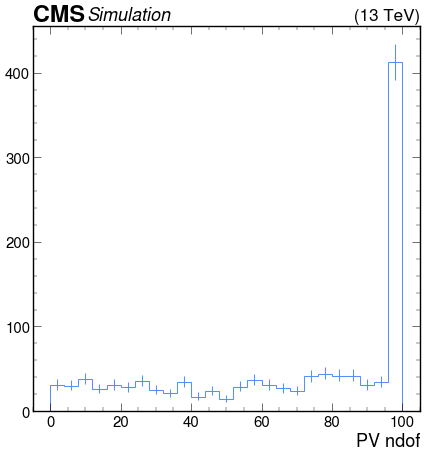

In [4]:
utilities.plot(out[samples[0]]["hists"]["pv_ndof"][channels[0], :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f94340e6780>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f94341048f0>, text=[])

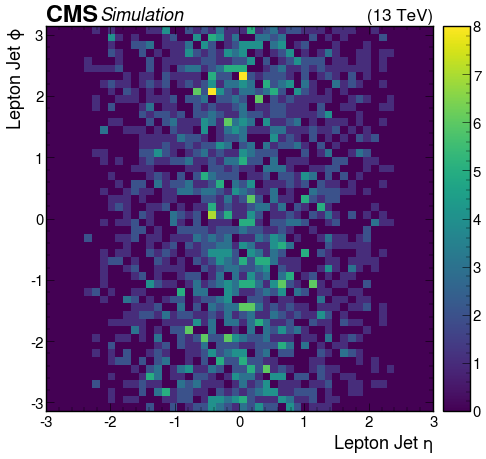

In [5]:
utilities.plot(out[samples[0]]["hists"]["lj_eta_phi"][channels[0], :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9428fa5640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

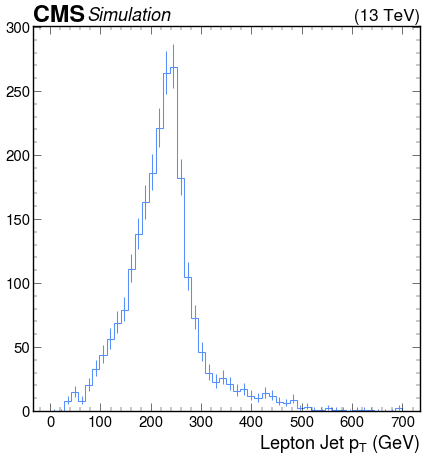

In [6]:
utilities.plot(out[samples[0]]["hists"]["lj_pt"][channels[0], ::2j])

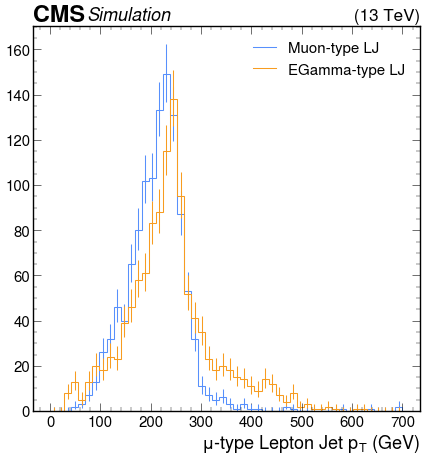

In [7]:
utilities.plot([
    out[samples[0]]["hists"]["mu_lj_pt"]["2mu2e", ::2j],
    out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()


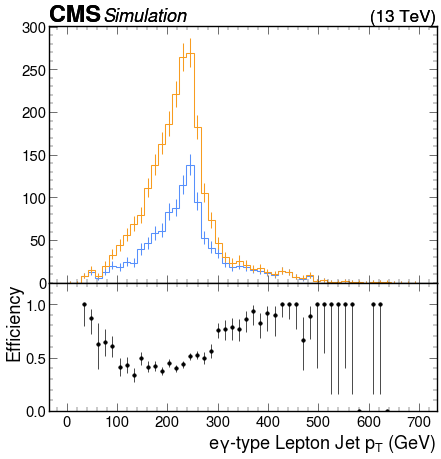

In [8]:
utilities.plot_ratio(
        out[samples[0]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
        out[samples[0]]["hists"]["lj_pt"]["2mu2e", ::2j],
)

In [10]:
fileset = utilities.make_fileset([samples[1]], "llpNanoAOD_v2", max_files=1, location_cfg="data.yaml")
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

{'dataset': 'DoubleMuon_2018C', 'filename': 
'root://xcache//store/group/lpcmetx/SIDM/Data/2018data/NanoAOD/DoubleMuon/LLPnanoAODv1_Run2018C-15Feb2022_UL2018-v1
/251125_125646/0000/output_1.root', 'treename': 'Events', 'entrystart': 0, 'entrystop': 10982, 'fileuuid': 
'3f1288ee-ca02-11f0-8019-022e12acbeef', 'skim_factor': 1.0, 'year': 2018, 'is_data': True, 'version': 'latest'}

Warning: weight not found in this sample. Skipping.

Warning: gens not found in this sample. Skipping.

Warning: genMus not found in this sample. Skipping.

Warning: genEs not found in this sample. Skipping.

Warning: genAs not found in this sample. Skipping.

Warning: genAs_toMu not found in this sample. Skipping.

Warning: genAs_toE not found in this sample. Skipping.

Warning: genMus not found in sample. The following cuts will not be applied: ['status 1']

Warning: genEs not found in sample. The following cuts will not be applied: ['status 1']

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

DoubleMuon_2018C is data. Not scaling histograms or cutflows.


In [11]:
out[samples[1]]["cutflow"][channels[0]].print_table()
print()
out[samples[1]]["cutflow"][channels[0]].print_table(unweighted=True)
print()
out[samples[1]]["cutflow"][channels[0]].print_table(fraction=True)
print()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection              10982.0      10982.0
pass triggers              3078.0       3078.0
PV filter                 10971.0       3076.0
>=2 LJs                      10.0          2.0
2mu2e                         7.0          2.0

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection              10982.0      10982.0
pass triggers              3078.0       3078.0
PV filter                 10971.0       3076.0
>=2 LJs                      10.0          2.0
2mu2e                         7.0          2.0

cut name         individual %    marginal %    cumulative %
-------------  --------------  ------------  --------------
No selection            100.0         100.0           100.0
pass triggers            28.0          28.0            28.0
PV filter                99.9          99.9            28.0
>=2 LJs                   0.1           

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f94282b9610>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

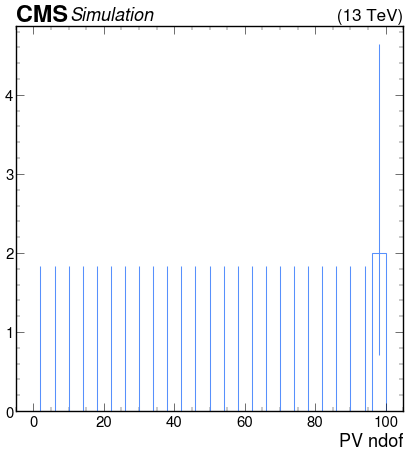

In [12]:
utilities.plot(out[samples[1]]["hists"]["pv_ndof"][channels[0], :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f9412246030>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f9412353440>, text=[])

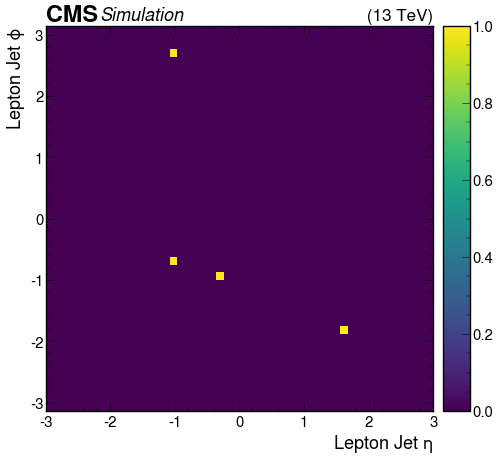

In [13]:
utilities.plot(out[samples[1]]["hists"]["lj_eta_phi"][channels[0], :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f941210daf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

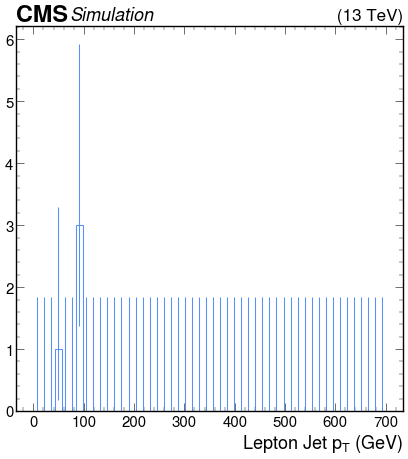

In [14]:
utilities.plot(out[samples[1]]["hists"]["lj_pt"][channels[0], ::2j])

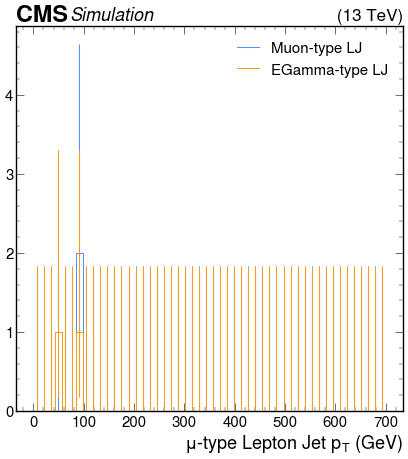

In [15]:
utilities.plot([
    out[samples[1]]["hists"]["mu_lj_pt"]["2mu2e", ::2j],
    out[samples[1]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()


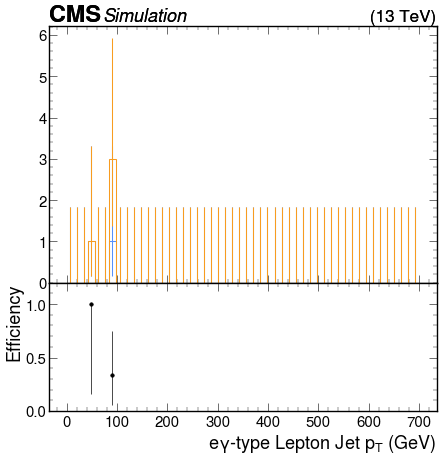

In [16]:
utilities.plot_ratio(
        out[samples[1]]["hists"]["egm_lj_pt"]["2mu2e", ::2j],
        out[samples[1]]["hists"]["lj_pt"]["2mu2e", ::2j],
)